<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Gradient Descent and Nonlinear Least-Square </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.00</h2>
</center>

<div id='toc' />

## Table of Contents
* [Introduction](#intro)
* [Weighted least-square](#wLeastSquare)
    * [Example in explanation](#exampleExplanation)
    * [Extension of "Initial Example" in jupyter notebook "07_08_Least_Squares"](#extensionInitialExample)
* [Acknowledgements](#acknowledgements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla
%matplotlib inline
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn import datasets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, RadioButtons
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
M=8

<div id='intro' />

## Introduction
[Back to TOC](#toc)

This jupyter notebook presents the algorithm of Gradient Descent applied to non-linear least-square problems.

<div id='GradientDenscent' />

## Gradient Descent
[Back to TOC](#toc)

The algorithm of Gradient Descent is used in Optimization, in particular, in problems when we want to minimize a function (or equivalently in maximization problem by changing the sign of the function).
This algorithm considers a function $f(\mathbf{x}):\mathbb{R}^n \rightarrow \mathbb{R}$, which has at least a local minimum near the point $\mathbf{x}_0$.
The algorithm considers that we have access to the gradient of $f(\mathbf{x})$, i.e. $\nabla f(\mathbf{x})$, which indicates the direction of fastest increase of $f(\mathbf{x})$ at the point $\mathbf{x}$, or equivalently, $-\nabla f(\mathbf{x})$ is teh direction of fastest decrease.
Thus, the algorithm is the following,
- Select an initial guess, say $\mathbf{x}_0$
- Compute the direction of fastest decrease: $\mathbf{d}_0=-\nabla f(\mathbf{x}_0)$
- Update the approximation $\mathbf{x}_1=\mathbf{x}_0+\alpha\,\mathbf{d}_0$
- Iterate until certain threshold is achieved.
where $\alpha$ is a scaling factor for the Gradient Descent step.
The coefficient $\alpha$ could also depend on on the iteration number, such that it adapts based on the iterations.



<div id='GradientDenscent1D' />

## Gradient Descent in 1D
[Back to TOC](#toc)

To primary explain the algorithm, considere the following 1D example:
$$
f(x) = (x - 2)\,\sin(2\,x) + x^2.
$$
We will first plot the function as follows:

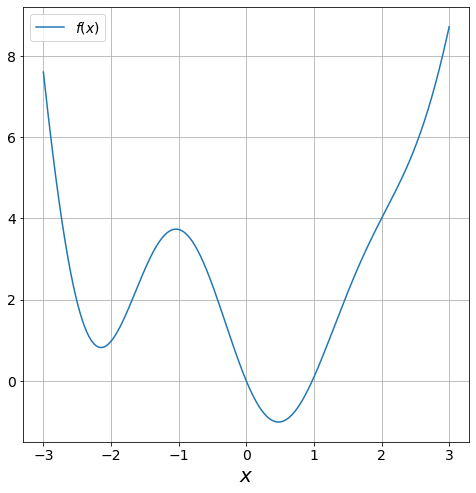

In [2]:
# Defining the function using a 'lambda' definition.
f = lambda x: (x - 2)*np.sin(2*x) + np.power(x,2)

# Defining the grid for plotting, the number '1000' indicates the number of points of the sample. 
# Suggestion: Change it and see what happends! For instance, what about if you change to 10?
xx = np.linspace(-3,3,1000)
# Plotting the function
plt.figure(figsize=(8,8))
plt.plot(xx,f(xx),'-',label=r'$f(x)$')
plt.grid(True)
plt.xlabel('$x$')
plt.legend(loc='best')
plt.show()

Now, we will create an interactive use of the Gradient Descent in 1D where you could define the initial guess $x_0$, the scaling factor $\alpha$ and the iteration number.
In this numerical experiment we will the importance of the coefficient $\alpha$, and how it is related to the 'gradient' and the initial guess.

In [3]:
def GD_1D(x0=2, alpha=1, n=0):
    
    # Defining the function using a 'lambda' definition and its derivative.
    f = lambda x: (x-2)*np.sin(2*x)+np.power(x,2)
    fp = lambda x: 2*x+2*(x-2)*np.cos(2*x)+np.sin(2*x)
    
    # Plotting the function and its derivative.
    xx = np.linspace(-3,3,1000)
    plt.figure(figsize=(14,7))
    
    ax = plt.subplot(1,2,1)
    plt.plot(xx,f(xx),'b-',label=r'$f(x)$')
    # Warning: The 'alpha' parameter for the plt.plot function corresponds to
    # a transparency parameter, it is not related to the alpha parameter of
    # the Gradient Descent explained before.
    plt.plot(xx,fp(xx),'r-',label=r"$f'(x)$", alpha=0.5)
    plt.grid(True)
    plt.xlabel('$x$')
    plt.title('Plot in linear scale')
    
    # Plotting outcome with no iterations
    plt.plot(x0,f(x0),'k.',markersize=10,label=r'$x_i$')
    plt.plot(x0,fp(x0),'m.',markersize=10,label=r"$f'(x_i)$: 'Gradient'")
    ax = plt.subplot(1,2,2)
    plt.semilogy(xx,np.abs(f(xx)),'b-',label=r"$|f(x)|$")
    plt.semilogy(xx,np.abs(fp(xx)),'r-',label=r"$|f'(x)|$", alpha=0.5)
    plt.grid(True)
    plt.xlabel('$x$')
    plt.title('Plot in logarithmic scale')
    plt.semilogy(x0,np.abs(f(x0)),'k.',markersize=10,label=r'$x_i$')
    plt.semilogy(x0,np.abs(fp(x0)),'m.',markersize=10,label=r"$|f'(x_i)|$: 'Gradient'")
    
    # Computing steps of Gradient Descent
    if n>0:
        xi_output=np.zeros(n+1)
        xi_output[0]=x0
        for k in range(n):
            fp_x0=fp(x0)
            x1 = x0-alpha*fp_x0
            xi_output[k+1]=x1
            x0 = x1
        ax = plt.subplot(1,2,1)
        plt.plot(xi_output,f(xi_output),'k.-',markersize=10,label=r'$x_i$')
        plt.plot(xi_output,fp(xi_output),'m.',markersize=10)
        ax = plt.subplot(1,2,2)
        plt.semilogy(xi_output,np.abs(f(xi_output)),'k.-',markersize=10,label=r'$x_i$')
        plt.semilogy(xi_output,np.abs(fp(xi_output)),'m.',markersize=10)
        
    
    # Plotting outcome
    ax = plt.subplot(1,2,1)
    plt.legend(loc='best')
    ax = plt.subplot(1,2,2)
    plt.legend(loc='best')
    
    plt.show()
    
interact(GD_1D,x0=(-3,3,0.1), alpha=(0,10,0.01), n=(0,100,1))

interactive(children=(FloatSlider(value=2.0, description='x0', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

<function __main__.GD_1D(x0=2, alpha=1, n=0)>

What conclusions could be draw?

The main conclusion that can be draw is the importance of the selection of the parameter $\alpha$ for the success of the task of finding a minimum of a function.
Also, as ussual, the initial guess $x_0$ will help us to select different local minima.

Question to think about:
- What could happen if you normalize the 'gradient'? In 1D this would be computing the following coeficients: $GN=\frac{f'(x_i)}{|f'(x_i)|}$, this will gives us the 'direction' where we should move (in 1D is just the sign of the derivative), then the coefficient $\alpha$ may control a bit more the magnitude of each step from $x_i$ to $x_{i+1}$. So, how do we undertand this? Implement it!


<div id='GD_2D_LinearLeastSquare' />

## Gradient Descent for a 2D linear least-square problem
[Back to TOC](#toc)

In this case we will solve the following least-square problem:
$$
\begin{equation}
    \underbrace{\begin{bmatrix}
        1 & x_1 \\
        1 & x_2 \\
        1 & x_3 \\
        \vdots & \vdots \\
        1 & x_m
    \end{bmatrix}}_{\displaystyle{A}}
    \underbrace{\begin{bmatrix}
        a\\
        b
    \end{bmatrix}}_{\mathbf{x}}
    =
    \underbrace{\begin{bmatrix}
        y_1 \\
        y_2 \\
        y_3 \\
        \vdots\\
        y_m 
    \end{bmatrix}}_{\displaystyle{\mathbf{b}}}.
\end{equation}
$$
This overdetermined linear least-square problem can be translated to the following form:
$$
\begin{equation}
    E(a,b)=\left\|\mathbf{b}-A\,\mathbf{x}\right\|_2^2=\sum_{i=1}^m (y_i-a-b\,x_i)^2.
\end{equation}
$$
Now, to apply the Gradient Descent algorithm we need to compute the Gradient of $E(a,b)$ with respect to $a$ and $b$, which is the following,
$$
\begin{align*}
    \frac{\partial E}{\partial a} &= \sum_{i=1}^m -2\,(y_i-a-b\,x_i),\\
    \frac{\partial E}{\partial b} &= \sum_{i=1}^m -2\,x_i\,(y_i-a-b\,x_i).
\end{align*}
$$
Notice that in this case we don't want to cancel out the "-" (minus) sign since it will change the direction of the Gradient.
Now, we have everything to apply the Gradient Descent in 2D.
For comparison purposes, we will also include the solution obtain by the normal equations.

In [4]:
def GD_2D_linear(a0=2, b0=2, alpha=0, n=0, m=10):
    
    # Building data.
    np.random.seed(0)
    xi = np.random.normal(size=m)
    yi = -2+xi+np.random.normal(loc=0, scale=0.5, size=m)

    # Defining matrix A and the right-hand-side.
    # Recall that we usually denote as b the right-hand-side but to avoid confusion with
    # the coefficient b, we will just call it RHS.
    A = np.ones((m,2))
    A[:,1] = xi
    RHS = yi
    
    # Defining the Gradient
    E = lambda a, b: np.sum(np.power(yi-a-b*xi,2))
    G = lambda a, b: np.array([np.sum(-2*(yi-a-b*xi)), np.sum(-2*xi*(yi-a-b*xi))],dtype=float)
    # This fucntion will help us to evaluate the Gradient on the points (X[i,j],Y[i,j])
    def E_mG_XY(AA,BB):
        Z = np.zeros_like(AA)
        U = np.zeros_like(AA)
        V = np.zeros_like(AA)
        for i in range(m):
            for j in range(m):
                Z[i,j]=E(AA[i,j],BB[i,j])
                uv = -G(AA[i,j],BB[i,j])
                U[i,j] = uv[0]
                V[i,j] = uv[1]
        return Z, U, V
    
    # Plotting the function and its gradient.
    # Credits: 
    #  https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
    #  https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/
    x = np.linspace(-5,5,m)
    AA, BB = np.meshgrid(x,x)
    fig = plt.figure(figsize=(14,10))
    Z, U, V = E_mG_XY(AA,BB)
    cont = plt.contour(AA,BB,Z, 100)
    stream = plt.streamplot(AA, BB, U, V, color=Z, linewidth=2, cmap='autumn', arrowstyle='->', arrowsize=2)
    fig.colorbar(stream.lines)
    fig.colorbar(cont)
    plt.scatter(a0, b0, s=300, marker='.', c='k')
    my_grad = G(a0,b0)
    my_title = r'$\alpha=$ %.4f, $E(a,b)=$ %.4f, $\nabla E(a,b)=$ [%.4f, %.4f]' %  (alpha, E(a0,b0), my_grad[0], my_grad[1])
    plt.title(my_title)
    
    # Computing steps of Gradient Descent
    if n>0:
        ab_output=np.zeros((n+1,2))
        z0 = np.array([a0,b0],dtype=float)
        z0[0] = a0
        z0[1] = b0
        ab_output[0,:]=z0
        # The Gradient Descent Algorithm
        for k in range(n):
            G_E_0=G(z0[0],z0[1])
            z1 = z0-alpha*G_E_0
            ab_output[k+1,:]=z1
            z0 = z1
            plt.scatter(z1[0], z1[1], s=300, marker='.', c='k')
        plt.plot(ab_output[:,0],ab_output[:,1],'k-')
        my_grad = G(ab_output[-1,0],ab_output[-1,1])
        my_title = r'$\alpha=$ %.4f, $E(a,b)=$ %.4f, $\nabla E(a,b)=$ [%.4f, %.4f]' %  (alpha, E(ab_output[-1,0],ab_output[-1,1]), my_grad[0], my_grad[1])
        plt.title(my_title)
    plt.show()
    
interact(GD_2D_linear, a0=(-4,4,0.1), b0=(-4,4,0.1), alpha=(0,0.1,0.0001), n=(0,100,1), m=(10,100,10))

interactive(children=(FloatSlider(value=2.0, description='a0', max=4.0, min=-4.0), FloatSlider(value=2.0, desc…

<function __main__.GD_2D_linear(a0=2, b0=2, alpha=0, n=0, m=10)>

In the previous implementation we used the following notation:
- $n$: Number of iteration of Gradient Descent
- Black dot: Solution $[a_n,b_n]$ at $n$-th step of the Gradient Descent.
- Red-Yellow streamplot: Stream plot of the vector field generated by minus the Gradient of the error function $E(a,b)$
- Blue-Green contour: Contour plot of the error function $E(a,b)$.

Questions:
- Try: $\alpha=0.02$, $n=20$, and $m=10$. What do you observe? (keep initialization values of $a_0$ and $a_1$)
- Try: $\alpha=0.04$, $n=20$, and $m=10$. What do you observe? (keep initialization values of $a_0$ and $a_1$)
- Try: $\alpha=0.08$, $n=20$, and $m=10$. What do you observe? (keep initialization values of $a_0$ and $a_1$)
- Can we use a large value of $\alpha$?
- How is related $\alpha$ and the iteration number $n$?


<div id='GD_2D_NonLinearLeastSquare' />

## Gradient Descent for a 2D nonlinear least-square problem
[Back to TOC](#toc)

In this case, we will explore the use of the the Gradient Descent algorithm applied to a nonlinear least-square problem with an exponential fit.
Let the function to be fit be,
$$
\begin{equation}
    y(t) = a\,\exp(b\,t),
\end{equation}
$$
where the error function is defined as follows,
$$
\begin{equation}
    E(a,b)==\sum_{i=1}^m (y_i-a\,\exp(b\,t_i))^2.
\end{equation}
$$
Now, to apply the Gradient Descent algorithm we need to compute the Gradient of $E(a,b)$ with respect to $a$ and $b$, which is the following,
$$
\begin{align*}
    \frac{\partial E}{\partial a} &= \sum_{i=1}^m 2\,\exp(b\,t_i)(a\,\exp(b\,t_i)-y_i),\\
    \frac{\partial E}{\partial b} &= \sum_{i=1}^m 2\,a\,\exp(b\,t_i)\,t_i\,(a\,\exp(b\,t_i)-y_i).
\end{align*}
$$
As you may expect, this approach may create very large values for the gradient, which will be very challenging to handle them numerically.
So, an alternative approach is the following,  which we will call it "The Variant":
- Select an initial guess, say $\mathbf{x}_0$
- Compute the direction of fastest decrease: $\mathbf{d}_0=-\nabla f(\mathbf{x}_0)$
- Update the approximation $\mathbf{x}_1=\mathbf{x}_0+\alpha\,\frac{\mathbf{d}_0}{\|\mathbf{d}_0\|}$
- Iterate until certain threshold is achieved.
Thus, the only change is on the magnitud of the **direction** vector used.
In this case, it will be a unitary direction. 
This brings the advantage that $\alpha$ now controls the **length** of the update.
This is useful when you want to control the increment, otherwise it may require a very fine tuning of the parameter (or in general hyperparameter tuning!).

In [5]:
def GD_2D_nonlinear(a0=0.75, b0=0.75, alpha=0, n=0, m=10, TheVariantFlag=False):
    
    # Building data.
    np.random.seed(0)
    a = 1.1
    b = 0.23
    y = lambda t: a*np.exp(b*t)
    T = 10
    ti = T*(np.random.rand(m)*2-1)
    yi = y(ti)+np.random.normal(loc=0, scale=0.1, size=m)
    
    # Defining the Gradient
    E = lambda a, b: np.sum(np.power(yi-a*np.exp(b*ti),2))
    G = lambda a, b: np.array([np.sum(2*np.exp(b*ti)*(a*np.exp(b*ti)-yi)), np.sum(2*a*np.exp(b*ti)*ti*(a*np.exp(b*ti)-yi))],dtype=float)
    # This fucntion will help us to evaluate the Gradient on the points (X[i,j],Y[i,j])
    def E_mG_XY(AA,BB):
        Z = np.zeros_like(AA)
        U = np.zeros_like(AA)
        V = np.zeros_like(AA)
        for i in range(m):
            for j in range(m):
                Z[i,j]=E(AA[i,j],BB[i,j])
                uv = -G(AA[i,j],BB[i,j])
                U[i,j] = uv[0]
                V[i,j] = uv[1]
        return Z, U, V
    
    # Plotting the function and its gradient.
    # Credits: 
    #  https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html
    #  https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/
    x = np.linspace(-3,3,m)
    AA, BB = np.meshgrid(x,x)
    fig = plt.figure(figsize=(14,10))
    Z, U, V = E_mG_XY(AA,BB)
    cont = plt.contour(AA,BB,Z, 10)
    stream = plt.streamplot(AA, BB, U, V, color=Z, linewidth=2, cmap='autumn', arrowstyle='->', arrowsize=2)
    fig.colorbar(stream.lines)
    fig.colorbar(cont)
    plt.scatter(a0, b0, s=300, marker='.', c='k')
    my_grad = G(a0,b0)
    my_title = r'$\alpha=$ %.4f, $E(a,b)=$ %.4f, $\nabla E(a,b)=$ [%.4f, %.4f]' %  (alpha, E(a0,b0), my_grad[0], my_grad[1])
    plt.title(my_title)
    
    # Computing steps of Gradient Descent
    if n>0:
        ab_output=np.zeros((n+1,2))
        z0 = np.array([a0,b0],dtype=float)
        z0[0] = a0
        z0[1] = b0
        ab_output[0,:]=z0
        # The Gradient Descent Algorithm
        for k in range(n):
            G_E_0=G(z0[0],z0[1])
            if not TheVariantFlag:
                # Traditional GD
                z1 = z0-alpha*G_E_0
            else:
                # The Variant! Why would this be useful?
                z1 = z0-alpha*G_E_0/np.linalg.norm(G_E_0)
            ab_output[k+1,:]=z1
            z0 = z1
            plt.scatter(z1[0], z1[1], s=300, marker='.', c='k')
        plt.plot(ab_output[:,0],ab_output[:,1],'k-')
        my_grad = G(ab_output[-1,0],ab_output[-1,1])
        my_title = r'$\alpha=$ %.6f, $E(a,b)=$ %.4f, $\nabla E(a,b)=$ [%.4f, %.4f]' %  (alpha, E(ab_output[-1,0],ab_output[-1,1]), my_grad[0], my_grad[1])
        plt.title(my_title)
        print('GD found:',ab_output[-1,0],ab_output[-1,1])
        
    # Plotting the original data and the "transformed" solution
    # Using the same notation from classnotes:
    A = np.ones((m,2))
    A[:,1]=ti
    K_c2 =np.linalg.lstsq(A,np.log(yi), rcond=None)[0]
    c1_ls = np.exp(K_c2[0])
    c2_ls = K_c2[1]
    print('Transformed Linear LS solution:',c1_ls, c2_ls)
    plt.plot(c1_ls,c2_ls,'ms',markersize=20, label='Transformed Linear LS')
    print('Original data:',a,b)
    plt.plot(a,b,'bd',markersize=20, label='Original data')
        
    plt.legend(loc='lower right')
    plt.show()

radio_button_TheVariant=RadioButtons(
    options=[('Traditional GD',False),('The Variant GD',True)],
    value=False,
    description='GD type:',
    disabled=False
)
    
interact(GD_2D_nonlinear, a0=(-2,2,0.01), b0=(-2,2,0.01), alpha=(0,1,0.0001), n=(0,1000,1), m=(10,100,10), TheVariantFlag=radio_button_TheVariant)

interactive(children=(FloatSlider(value=0.75, description='a0', max=2.0, min=-2.0, step=0.01), FloatSlider(val…

<function __main__.GD_2D_nonlinear(a0=0.75, b0=0.75, alpha=0, n=0, m=10, TheVariantFlag=False)>

In the previous implementation we used the following notation:
- $n$: Number of iteration of Gradient Descent
- Black dot: Solution $[a_n,b_n]$ at $n$-th step of the Gradient Descent.
- Red-Yellow streamplot: Stream plot of the vector field generated by minus the Gradient of the error function $E(a,b)$
- Blue-Green contour: Contour plot of the error function $E(a,b)$.


<div id='acknowledgements' />

# Acknowledgements
[Back to TOC](#toc)
* _Material created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`) DI UTFSM. November 2021.- v1.0.